## Downloading Dataset

In [1]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz

--2022-05-31 06:10:36--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154050105 (147M) [application/octet-stream]
Saving to: ‘Video_Games_5.json.gz’

Video_Games_5.json. 100%[===================>] 146.91M  39.6MB/s    in 4.2s    

2022-05-31 06:10:40 (35.3 MB/s) - ‘Video_Games_5.json.gz’ saved [154050105/154050105]



In [10]:
!gunzip /content/Video_Games_5.json.gz


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


## Loading required libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
# df = pd.read_json('/content/Video_Games_5.json')
# df.head()

ValueError: ignored

**above cell will give error**

Trailing data occurs when you try to load the JSON data or file into pandas DataFrame, and the data is written in lines separated with newline characters such as '\n'.

We will use ```lines=True``` param

**Loading Dataset into Dataframe**

In [13]:
df = pd.read_json('/content/Video_Games_5.json',lines=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [14]:
df.shape

(497577, 12)

**Data Dictionary**

*reviewerID* - ID of the reviewer, e.g. A2SUAM1J3GNN3B</br>
*asin* - ID of the product, e.g. 0000013714</br>
*reviewerName* - name of the reviewer</br>
*vote* - helpful votes of the review</br>
*style* - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
*reviewText* - text of the review</br>
*overall* - rating of the product</br>
*summary* - summary of the review</br>
*unixReviewTime* - time of the review (unix time)</br>
*reviewTime* - time of the review (raw)</br>
*image* - images that users post after they have received the product

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         497577 non-null  int64 
 1   verified        497577 non-null  bool  
 2   reviewTime      497577 non-null  object
 3   reviewerID      497577 non-null  object
 4   asin            497577 non-null  object
 5   reviewerName    497501 non-null  object
 6   reviewText      497419 non-null  object
 7   summary         497468 non-null  object
 8   unixReviewTime  497577 non-null  int64 
 9   vote            107793 non-null  object
 10  style           289237 non-null  object
 11  image           3634 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 42.2+ MB


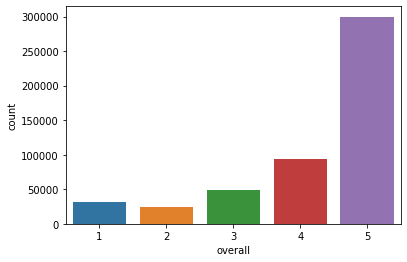

In [19]:
sns.countplot(data = df, x='overall');

In [31]:
if df['overall'].value_counts()[5] > (df['overall'].value_counts()[4]+df['overall'].value_counts()[3]+df['overall'].value_counts()[3]+df['overall'].value_counts()[1]):
  print('5* rating is greater then sum of all other ratings')

5* rating is greater then sum of all other ratings


**Data is hoghly imbalances**:  Number of 5* reviews are very high

In [22]:
len(df['asin'].value_counts(dropna=False))

17408

**Total Products =**  17408

## Creating a smaller balanced corpus

In [32]:
r1_1500 = df[df['overall']==1.0].sample(n=1500)
r2_500 = df[df['overall']==2.0].sample(n=500)
r3_500 = df[df['overall']==3.0].sample(n=500)
r4_500 = df[df['overall']==4.0].sample(n=500)
r5_1500 = df[df['overall']==5.0].sample(n=1500)

In [33]:
print(r1_1500.shape, r2_500.shape, r3_500.shape, r4_500.shape, r5_1500.shape)

(1500, 12) (500, 12) (500, 12) (500, 12) (1500, 12)


**Creating Balanced Dataset**

In [34]:
df_undersampled = pd.concat([r1_1500, r2_500, r3_500, r4_500, r5_1500], axis=0)

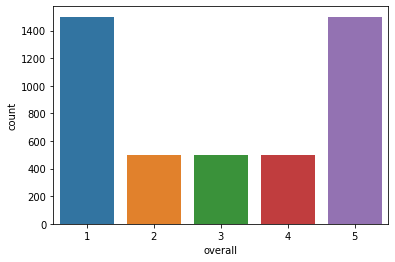

In [35]:
sns.countplot(data=df_undersampled, x='overall');

## Random Sampling of 100K Reviews

In [36]:
df_100K_revs = df.sample(n=100000, random_state=42)

## Final datasets

In [39]:
df_100K_revs.to_csv('/content/drive/MyDrive/dataset/Amazon_Marketing_dataset_NLP/big_corpus.csv',index=False)
df_undersampled.to_csv('/content/drive/MyDrive/dataset/Amazon_Marketing_dataset_NLP/small_corpus.csv',index=False)